# Recogmem: Group Analysis

Exploring an openly avaialble NWB formatted dataset from the Rutishauser lab. 

Github: https://github.com/rutishauserlab/recogmem-release-NWB

In [1]:
import os
from os.path import join as pjoin

import matplotlib.pyplot as plt

from pynwb import NWBFile, NWBHDF5IO

## Data Setup

In [2]:
# Set the data path
data_path = '/Users/tom/Desktop/HumanSingleNeurons/RutishauserSU/'

# Get a list of available files
files = os.listdir(data_path)

## Group Level Analysis

In [3]:
# Set up some data stores
n_wires = {}
n_units = {}
locations = {}

In [4]:
# Loop through all files, and collect some information across the group
for file in files:
    with NWBHDF5IO(pjoin(data_path, file), 'r') as io:
        nwbfile = io.read()

        n_wires[nwbfile.identifier] = len(nwbfile.electrodes.id[:])
        n_units[nwbfile.identifier] = len(nwbfile.units.origClusterID[:]) 
        locations[nwbfile.identifier] = set(nwbfile.electrodes.location[:])

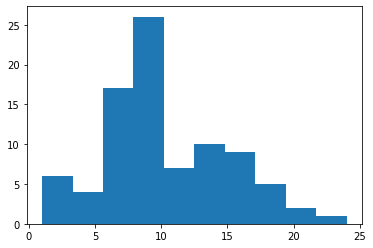

In [5]:
# Check the distribution of wires
plt.hist(n_wires.values());

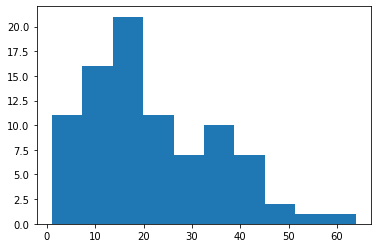

In [6]:
# Check the distribution of units
plt.hist(n_units.values());

In [7]:
# Print out information per session
print('IDENTIFIER   \t   N_WIRES   \t   N_UNITS')
for identifier in n_wires.keys():
    print('{:8}\t\t{:2}\t\t{:2}'.format(identifier, n_wires[identifier], n_units[identifier]))

IDENTIFIER   	   N_WIRES   	   N_UNITS
H19_28  		 7		15
H18_26  		16		33
H10_7   		18		38
H29_49  		10		27
CS29_69 		17		64
CS38_102		17		44
CS49_118		11		13
CS60_134		 8		14
CS48_116		14		36
H16_23  		 9		18
CS26_64 		 9		33
CS54_124		17		43
CS54_125		24		46
H14_17  		 9		23
CS53_123		 4		 6
H27_58  		14		49
CS54_126		15		34
CS53_122		15		27
CS26_66 		 6		11
CS32_74 		 9		35
H42_55  		13		32
H15_20  		11		20
CS33_77 		11		30
CS56_128		 7		 7
CS42_111		10		14
CS33_76 		14		53
T98_2005		11		13
H15_21  		 7		14
H16_24  		18		21
H42_54  		13		32
H31_50  		 7		14
CS57_130		11		16
CS57_131		 9		11
CS42_112		 7		12
CS37_96 		 8		13
H21_41  		 6		15
CS27_67 		 8		15
T100_2008		 1		 1
CS33_78 		 9		13
H23_47  		 7		17
H47_97  		 7		10
CS40_101		10		14
CS44_114		 9		15
H23_44  		 8		23
CS43_113		14		21
CS34_85 		 4		 6
T107_2007		 3		 3
CS24_60 		 9		22
CS51_120		 8		15
H17_32  		16		43
H43_56  		 6		15
T89_2004		21		31
CS25_63 		11		14
CS24_59 		 7		21
T88_2002		 4		 4
CS51_119		10		16
T101_20

In [8]:
# Print out information per session
print('IDENTIFIER   \t\tLOCATIONS')
for identifier in n_wires.keys():
    print('{:8}\t\t{}'.format(identifier, ', '.join(locations[identifier])))

IDENTIFIER   		LOCATIONS
H19_28  		Left Amygdala, Right Amygdala
H18_26  		Right Hippocampus, Left Amygdala, Right Amygdala, Left Hippocampus
H10_7   		Right Hippocampus, Left Amygdala, Right Amygdala
H29_49  		Right Hippocampus, Left Amygdala, Right Amygdala
CS29_69 		Right Hippocampus, Left Amygdala, Left Hippocampus
CS38_102		Right Hippocampus, Left Amygdala, Right Amygdala, Left Hippocampus
CS49_118		Right Hippocampus, Right Amygdala
CS60_134		Right Hippocampus, Right Amygdala
CS48_116		Right Hippocampus, Left Amygdala, Right Amygdala
H16_23  		Right Amygdala, Left Hippocampus
CS26_64 		Left Amygdala, Left Hippocampus
CS54_124		Right Hippocampus, Left Amygdala, Right Amygdala, Left Hippocampus
CS54_125		Right Hippocampus, Left Amygdala, Right Amygdala, Left Hippocampus
H14_17  		Right Amygdala, Left Hippocampus
CS53_123		Right Hippocampus, Left Amygdala
H27_58  		Right Hippocampus, Left Hippocampus
CS54_126		Right Hippocampus, Left Amygdala, Right Amygdala, Left Hippocampus
CS53_12